In [ ]:
import wfdb
from wfdb import processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
PATH = "apnea-ecg-database-1.0.0/"
SAMPTO = 2000

In [2]:
record_ecg = wfdb.rdrecord(PATH + "a01", sampto=SAMPTO)
annotation = wfdb.rdann(PATH+ "a01", 'qrs', sampto=SAMPTO, shift_samps=True)

df2 = record_ecg.to_dataframe()
df2['time'] = df2.index.microseconds / 1000 + df2.index.seconds * 1000
df2 = df2[['time', 'ECG']]
df2.reset_index(drop=True, inplace=True)
df2.head()

,time,ECG
0,0.0,-0.060
1,10.0,-0.065
2,20.0,-0.060
3,30.0,-0.075
4,40.0,-0.065


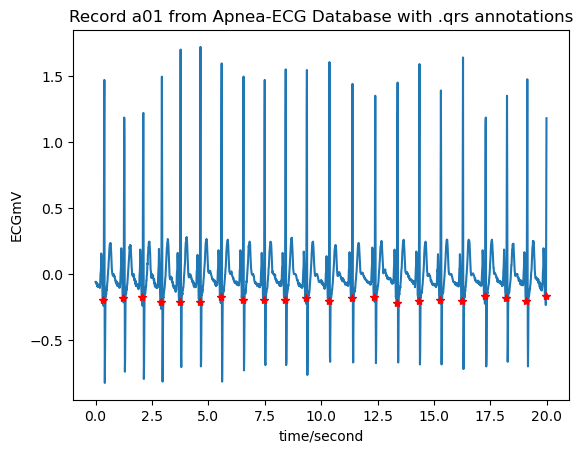

In [3]:
wfdb.plot_wfdb(record=record_ecg, annotation=annotation,
               title='Record a01 from Apnea-ECG Database with .qrs annotations',
               time_units='seconds')

[  34  123  207  290  373  461  554  652  746  839  932 1033 1135 1236
 1335 1432 1527 1625 1725 1820 1910 1995]
[ 89.  84.  83.  83.  88.  93.  98.  94.  93.  93. 101. 102. 101.  99.
  97.  95.  98. 100.  95.  90.  85.]


Text(0.5, 1.0, 'Fragment zapisu EKG dla jednego uderzenia')

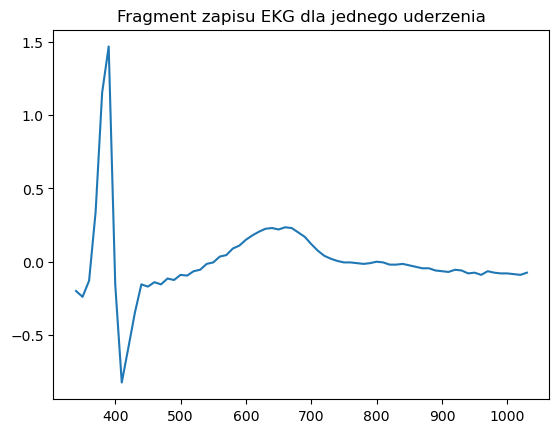

In [4]:
#przetwarzanie danych timeeeeeeee
print(annotation.sample)
num_of_beats = annotation.sample.size - 1
offset_l = 20
offset_r = 70

temp = np.zeros(num_of_beats)

for beat in range(num_of_beats):
    temp[beat] = annotation.sample[beat+1] - annotation.sample[beat]
print(temp)

#test czy to pojedyncze bicie

plt.plot(df2['time'][34-offset_l:34+offset_r], df2['ECG'][34-offset_l:34+offset_r])
plt.title('Fragment zapisu EKG dla jednego uderzenia')

In [5]:
beats = np.zeros((num_of_beats, offset_l+offset_r))

for beat in range(num_of_beats):
    start_pos = annotation.sample[beat]
    beats[beat] = df2['ECG'][start_pos-offset_l:start_pos+offset_r]


In [6]:
#jakas zabawa
# qrs_inds = processing.qrs.gqrs_detect(sig=record_ecg.p_signal[:,0], fs=200)
# qrs_inds = (1 / record_ecg.fs) * qrs_inds
# # print(qrs_inds.size)
# # Utwórz nowy wykres i oś
# signal = record_ecg.p_signal[:, 0]
# time = (1 / record_ecg.fs) * np.arange(len(signal))

# # Utwórz nowy wykres
# fig, ax = plt.subplots()

# # Wyświetl sygnał EKG na wykresie
# ax.plot(time, signal)

# # Wygeneruj i wyrysuj dodatkowe punkty na tym samym wykresie
# ax.plot(qrs_inds, np.zeros(qrs_inds.size), 'ro')  # 'ro' oznacza czerwone kropki

# # Wyświetl wykres z dodatkowymi punktami i etykietami
# plt.show()

In [7]:
scaler = StandardScaler()
scaler.fit(beats)
X_scaled = scaler.transform(beats)

In [8]:
pca = decomposition.PCA(n_components=4)
X_transformed = pca.fit_transform(X_scaled)

In [9]:
eigen_vectors = pca.components_
eigen_values = pca.explained_variance_
# print(eigen_vectors)
print(eigen_values)

[28.97026434 19.93957543  8.38365979  4.44883661]


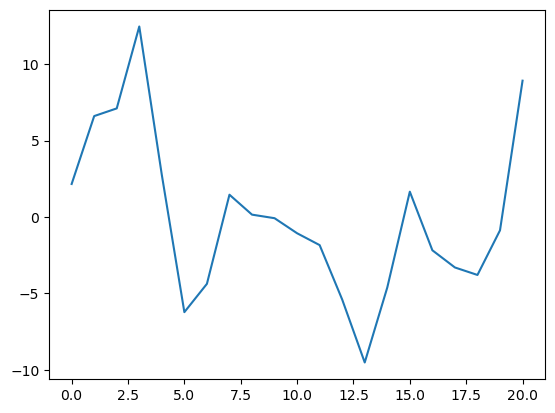

In [10]:
# plt.plot(df2.ECG)
plt.plot(X_transformed[:,0])
# plt.plot(X_transformed[:,1])
# plt.plot(X_transformed[:,2])
# plt.plot(X_transformed[:,3])
# plt.xlim(0, 100)

In [11]:
X_transformed

array([[ 2.15735812,  5.66414753, -2.42940122,  0.11691092],
       [ 6.59655147,  3.94510864, -0.35206806,  4.49029091],
       [ 7.09840848,  2.87515458, -2.91692193,  1.02427651],
       [12.45422293, -2.10232641, -0.73742862, -2.47326844],
       [ 2.74828368, -5.26296439, -1.27960249, -3.04450717],
       [-6.22158081, -5.28187018, -1.27932232, -0.53783318],
       [-4.37001552,  4.38865412, -4.68768614, -1.45890779],
       [ 1.45611734, -3.25067213,  0.05240524,  3.52668053],
       [ 0.15324146, -5.05964069, -0.55046463,  3.14019719],
       [-0.07957966, -7.12985965, -3.28284343,  0.89505225],
       [-1.06326323,  7.51356449,  1.34703462, -3.02706511],
       [-1.83821694,  1.12508829,  8.13719047, -0.79748141],
       [-5.39570482,  2.46220209,  2.56651403,  1.44778391],
       [-9.51135192,  0.65618848, -1.3076862 ,  1.37170881],
       [-4.60957404, -4.32388313,  0.83170829, -0.41747356],
       [ 1.65326017, -1.35460722,  3.47496358, -0.01316957],
       [-2.17721019,  0.

In [12]:
record = wfdb.rdrecord(PATH + "a01r", sampto=SAMPTO)

df = record.to_dataframe()
df['time'] = df.index.microseconds / 1000 + df.index.seconds * 1000
df = df[['time', 'Resp C', 'Resp A', 'Resp N']]
df.reset_index(drop=True, inplace=True)
df.head()

,time,Resp C,Resp A,Resp N
0,0.0,-0.1015,-0.3446,0.23545
1,10.0,-0.1025,-0.3455,0.23640
2,20.0,-0.1035,-0.3464,0.23735
3,30.0,-0.1045,-0.3473,0.23830
4,40.0,-0.1055,-0.3482,0.23925


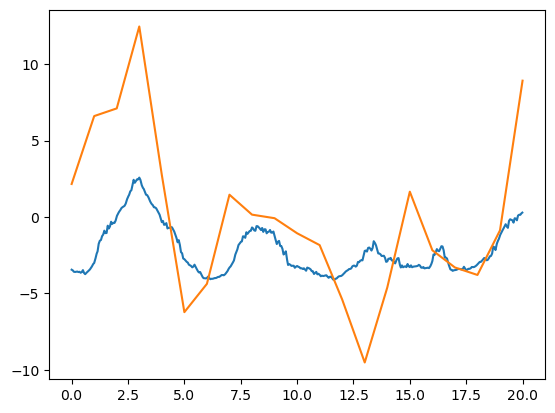

In [13]:
#plt.plot(df2['time'], df2['ECG'])
# plt.plot(df['time'], df['Resp C'])
plt.plot(df['time']/1000, df['Resp A']*10)
# plt.plot(df['time'], df['Resp N'])


plt.plot(X_transformed[:,0])

Text(0.5, 1.0, 'Zestawienie składowej oddechowej odseparowanej za pomocą PCA, jak i gotowej z bazy')

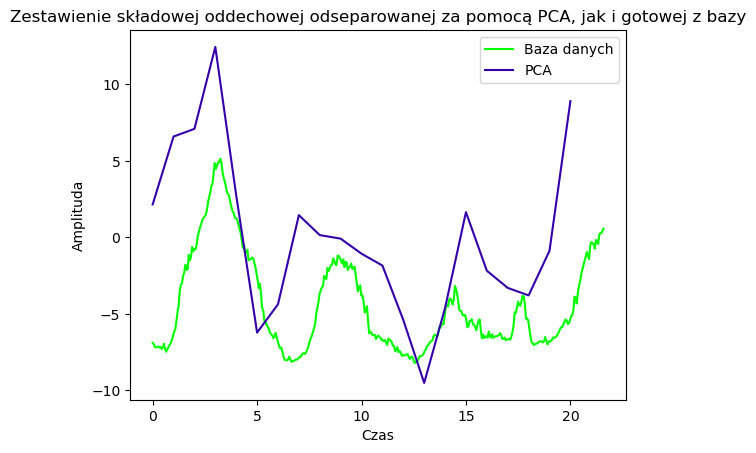

In [14]:
plt.plot(df['time']/1000*1.08, df['Resp A']*20, label='Baza danych', color='lime')
plt.plot(X_transformed[:,0], label='PCA', color=('#3300AA'))
plt.legend()

plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title('Zestawienie składowej oddechowej odseparowanej za pomocą PCA, jak i gotowej z bazy')

In [15]:
y_resp_norm = (df['Resp A']-min(df['Resp A'])) / max(df['Resp A']-min(df['Resp A']))
y_PCA_norm = (X_transformed[:,0]-min(X_transformed[:,0])) / max(X_transformed[:,0]-min(X_transformed[:,0]))

Text(0.5, 1.0, 'Zestawienie składowej oddechowej odseparowanej za pomocą PCA, jak i gotowej z bazy')

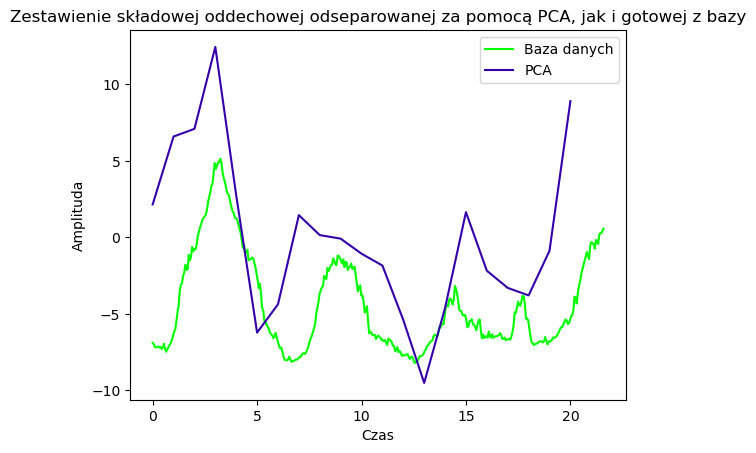

In [16]:
plt.plot(df['time']/1000*1.08, df['Resp A']*20, label='Baza danych', color='lime')
plt.plot(X_transformed[:,0], label='PCA', color=('#3300AA'))
plt.legend()

plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title('Zestawienie składowej oddechowej odseparowanej za pomocą PCA, jak i gotowej z bazy')

Text(0.5, 1.0, 'Zestawienie składowej oddechowej odseparowanej za pomocą PCA, jak i gotowej z bazy')

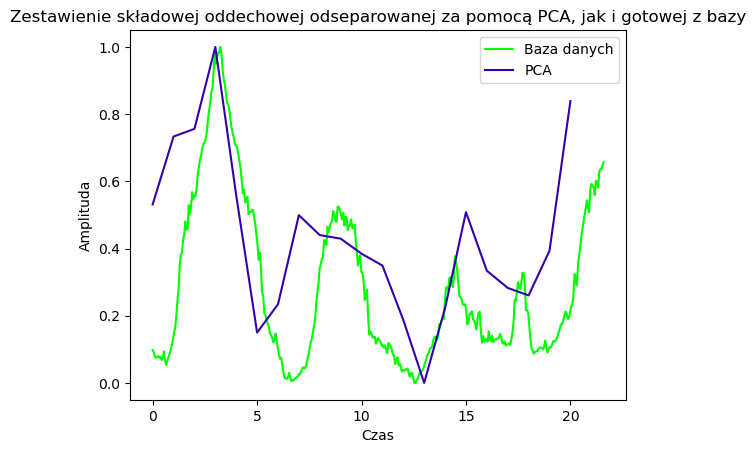

In [18]:
plt.plot(df['time']/1000*1.08, y_resp_norm, label='Baza danych', color='lime')
plt.plot(y_PCA_norm, label='PCA', color=('#3300AA'))
plt.legend()

plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title('Zestawienie składowej oddechowej odseparowanej za pomocą PCA, jak i gotowej z bazy')

In [75]:
kpca = decomposition.KernelPCA(n_components=4, kernel='cosine')
X_ktransformed = kpca.fit_transform(X_scaled)

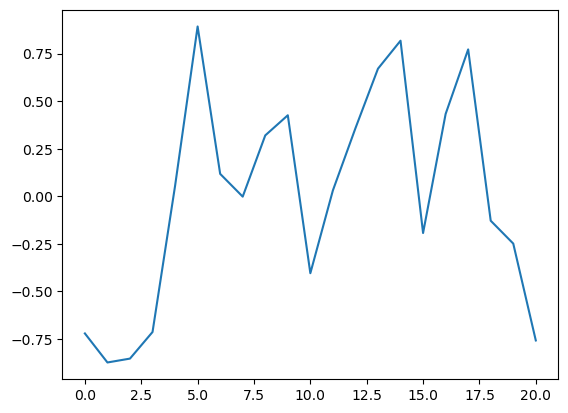

In [76]:
plt.plot(X_ktransformed[:,0])

In [77]:
y_resp_norm = (df['Resp A']-min(df['Resp A'])) / max(df['Resp A']-min(df['Resp A']))
y_kPCA_norm = (X_ktransformed[:,0]-min(X_ktransformed[:,0])) / max(X_ktransformed[:,0]-min(X_ktransformed[:,0]))

Text(0.5, 1.0, "Zestawienie EDR z kPCA (kernel='poly'), jak i gotowej z bazy")

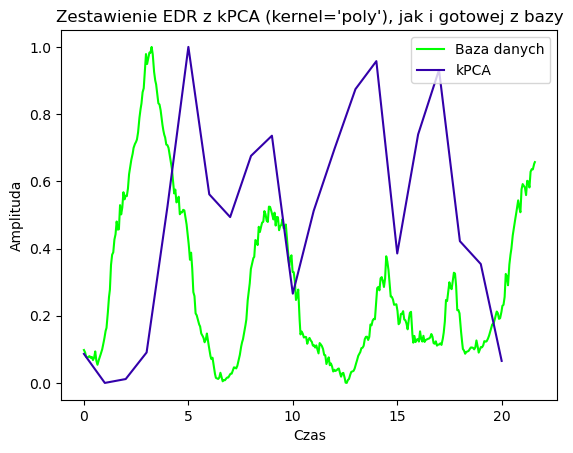

In [78]:
plt.plot(df['time']/1000*1.08, y_resp_norm, label='Baza danych', color='lime')
plt.plot(y_kPCA_norm, label='kPCA', color=('#3300AA'))
plt.legend()

plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title('Zestawienie EDR z kPCA (kernel=\'poly\'), jak i gotowej z bazy')

In [83]:
licznik = 1

In [84]:
def licznik():
    licznik += 1
    licznik()


In [85]:
licznik()

UnboundLocalError: local variable 'licznik' referenced before assignment